In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df = pd.read_csv("Music Sales.csv")
df.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


In [44]:
df.columns

Index(['Album', 'Artist', 'Bytes', 'Sales', 'City', 'Company', 'Composer',
       'Country', 'CustomerID', 'Email', 'FirstName', 'Genre', 'InvoiceDate',
       'InvoiceID', 'LastName', 'MediaType', 'Milliseconds',
       'Number of Records', 'Phone', 'PostalCode', 'Quantity', 'Region',
       'State', 'Track', 'UnitPrice'],
      dtype='object')

In [4]:
df.shape

(2143, 25)

In [9]:
df_eu = df[df['Region']== 'Europe']

## Bar Charts

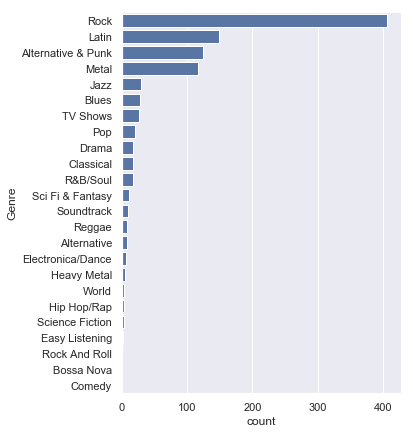

In [99]:
base_color = sns.color_palette()[0]
genre_order = df_eu['Genre'].value_counts().index
fig, ax = plt.subplots(figsize=(5,7))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.countplot(data = df_eu, y = "Genre",color = base_color, order =genre_order, ax =ax)




## Pie Chart

(-1.1020712769225787,
 1.1255481237273766,
 -1.1263639733476845,
 1.1012554273022708)

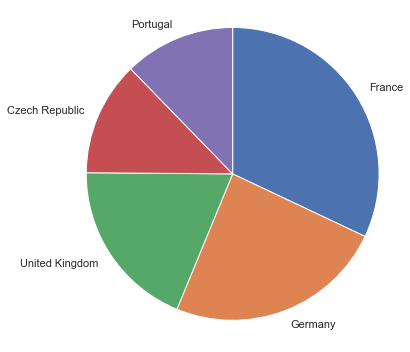

In [98]:
sorted_counts = df_eu['Country'].value_counts().head()
fig, ax = plt.subplots(figsize=(6,6))

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);

plt.axis('square')

## Histogram

(array([441., 413., 380., 434., 413.,  23.,   0.,  19.,   0.,  20.]),
 array([0.99 , 1.886, 2.782, 3.678, 4.574, 5.47 , 6.366, 7.262, 8.158,
        9.054, 9.95 ]),
 <a list of 10 Patch objects>)

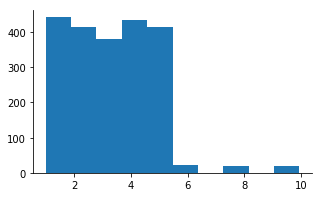

In [42]:
fig, ax = plt.subplots(figsize=(5,3))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(data = df, x = 'Sales')


C:\Users\kids1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


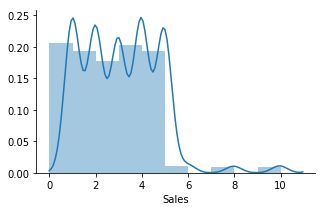

In [43]:
fig, ax = plt.subplots(figsize=(5,3))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
bin_edges = np.arange(0, df['Sales'].max()+1, 1)
sns.distplot(df['Sales'],  bins = bin_edges)


## Scatterplots

In [65]:
df_sales = df_eu[df_eu['Milliseconds']<1000000].groupby(['Album']).agg({'Sales':'sum', 'Milliseconds':'mean'})

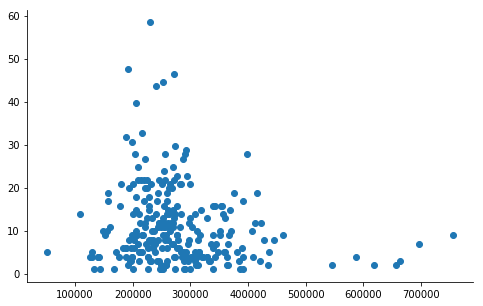

In [68]:
fig, ax = plt.subplots(figsize=(8,5))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.scatter(data = df_sales, x = 'Milliseconds', y = 'Sales')


## Treemap

In [72]:
df['RSales'] = df['Quantity'] * df['UnitPrice']

In [79]:
df_3 = df[['Country','RSales']].groupby('Country').sum()
df_3['Percentage'] = df_3['RSales']/df_3['RSales'].sum()
df_3['Percentage'] = df_3['Percentage'] * 100
df_3 = df_3.round(1)
df_3.reset_index(inplace = True)

In [80]:
india = df_3[df_3.Country == 'India']

df_3 =df_3[df_3.Country != 'India']
df_3['Labels'] = df_3['Country'] +"\n"+ df_3['Percentage'].astype(str) +"%"
df_3 = df_3.sort_values(by='Percentage', ascending=False)

In [81]:
import matplotlib
import squarify    # pip install squarify (algorithm for treemap)


norm = matplotlib.colors.Normalize(vmin=min(df_3.RSales), vmax=max(df_3.RSales))
colors = [matplotlib.cm.Oranges(norm(value)) for value in df_3.RSales]
df_3 = df_3.append(india)
colors.append((135/255,206/255,250/255, 1.0))

C:\Users\kids1\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


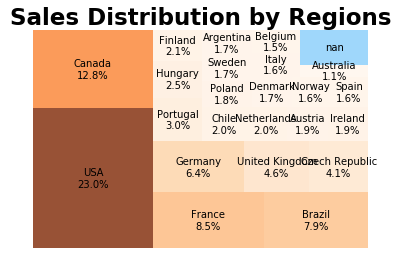

In [82]:
squarify.plot(label=df_3.Labels,sizes=df_3.Percentage, color = colors, alpha=.8)
plt.title("Sales Distribution by Regions",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()

## Boxplot

In [87]:
df_1 = df.groupby(['Genre','Album']).sum()
df_1.reset_index(inplace = True)

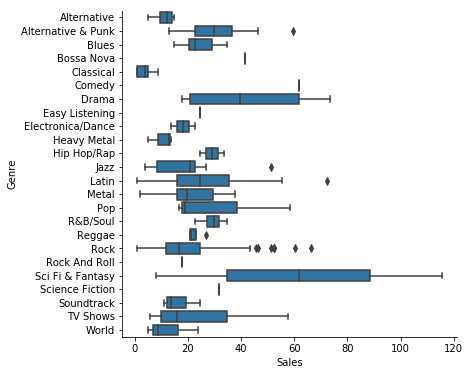

In [90]:
fig, ax = plt.subplots(figsize=(6,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.boxplot(data = df_1, x = 'Sales', y = 'Genre', color = base_color)

## Line plot 

In [96]:
from numpy import nanmean


In [93]:
df_eu['InvoiceDate'] = pd.to_datetime(df_eu['InvoiceDate'])
df_eu.sort_values(by=['InvoiceDate'], inplace = True)
df_eu['RSales'] = df_eu['Quantity'] * df_eu['UnitPrice']
df_eu['Year'] = df_eu['InvoiceDate'].apply(lambda x: x.year)
df_year = df_eu[(df_eu['Year'] == 2011) | (df_eu['Year'] == 2012)]
df_month = df_year.groupby(by =[pd.Grouper(key ='InvoiceDate',freq='M'), 'Genre']).agg({'RSales': 'sum'})

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

In [94]:
df_month['MShare'] = df_month['RSales']/ df_month.groupby(level= 0).sum()['RSales']
df_month= df_month.reset_index()
df_month['month_year'] = df_month.InvoiceDate.dt.to_period('M')
df_r = df_month.query("Genre == 'Rock'")

C:\Users\kids1\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


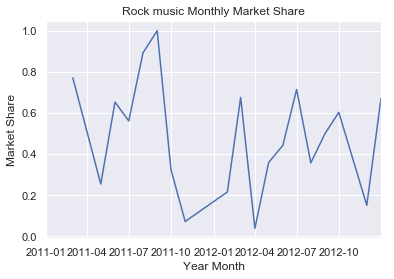

In [97]:
sns.set(style="darkgrid")

# Plot the responses for different events and regions
ax = sns.lineplot(x="InvoiceDate", y="MShare",
             data=df_r,  estimator =nanmean)
plt.xlim("2011-1-1", "2012-12-31")
ax.set(title = 'Rock music Monthly Market Share', xlabel='Year Month', ylabel='Market Share')
plt.show()

# Part II

## stacked bar chart

In [100]:
df_1 = pd.read_csv("fuel_econ.csv")

In [102]:
df_1.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [112]:
list(df_1.VClass.unique())

['Subcompact Cars',
 'Compact Cars',
 'Midsize Cars',
 'Large Cars',
 'Minicompact Cars']

In [110]:
df_1.drive.value_counts()

Front-Wheel Drive          1555
Rear-Wheel Drive           1221
All-Wheel Drive             913
4-Wheel Drive               228
Part-time 4-Wheel Drive      11
Automatic (A1)                1
Name: drive, dtype: int64

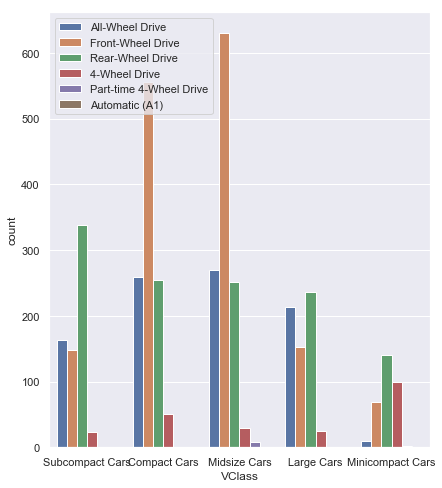

In [116]:
cat1_order = list(df_1.VClass.unique())
cat2_order = list(df_1.drive.unique())

plt.figure(figsize = [15, 8])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sns.countplot(data = df_1, x = 'VClass', hue = 'drive')
plt.legend()

C:\Users\kids1\Anaconda3\lib\site-packages\pandas\core\series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


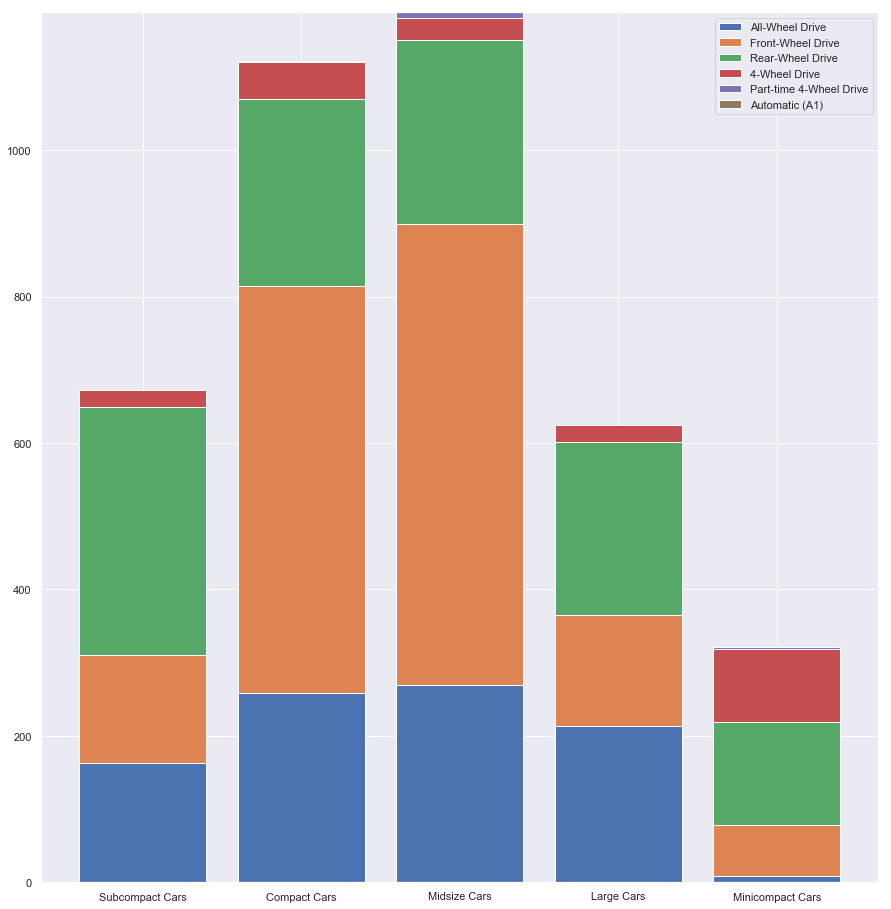

In [121]:
baselines = np.zeros(len(cat1_order))
plt.figure(figsize = [15, 16])

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df_1[df_1['drive'] == cat2]['VClass'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)

## Heat Map

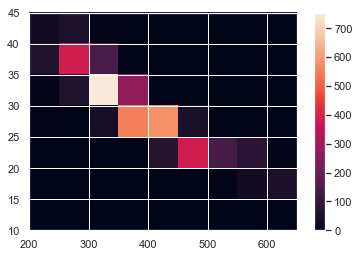

In [129]:
bins_x = np.arange(200, 700, 50)
bins_y = np.arange(10, 50, 5)
plt.hist2d(data = df_1, x = 'co2', y = 'highway',bins = [bins_x,bins_y])
plt.colorbar();

## rug plot 

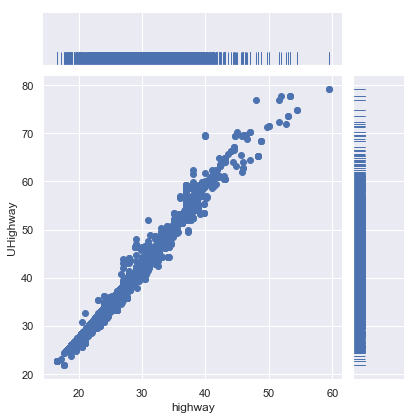

In [132]:
g = sns.JointGrid(data = df_1, x = 'highway', y = 'UHighway')
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot, height = 0.25)